# Mobile Price Prediction System

**Problem Statement**

Develop a mobile price prediction system that utilizes advanced regression analysis techniques to accurately forecast market prices of mobile phones based on comprehensive specifications and market data.

**Objective**

The primary objective of the Mobile Price Prediction System is to develop a robust predictive tool that can estimate the market prices of mobile phones based on their specifications. This tool aims to assist consumers in making cost-effective purchasing decisions and help retailers set competitive prices. Additionally, the project seeks to provide insights into the factors that most significantly impact mobile phone pricing.

____

### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")    
sns.set_context("paper", font_scale = 1.2)  # Set context and font size for better readability
sns.set_palette("viridis")  # Use a high-contrast, perceptually uniform color map

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('smartprix.csv') # loading dataset

In [3]:
df.head() # birdview

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus Nord CE 2 Lite 5G,"₹18,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
1,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
2,Samsung Galaxy F23 5G (6GB RAM + 128GB),"₹16,999",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [4]:
df.shape # rows & columns

(1020, 11)

In [5]:
df.info() # basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     793 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1018 non-null   object 
 9   card       993 non-null    object 
 10  os         951 non-null    object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [6]:
df.duplicated().sum() # duplication

0

In [7]:
df.isnull().sum() # null values

model          0
price          0
rating       227
sim            0
processor      0
ram            0
battery        0
display        0
camera         2
card          27
os            69
dtype: int64

_______
\- 'rating' feature has null values, and rating columns is not a independent feature. We are going to remove it.
_______

In [8]:
df.drop(columns = ['rating'], inplace = True)

_____

### Data Cleaning
_____

In [9]:
df.head()

,model,price,sim,processor,ram,battery,display,camera,card,os
0,OnePlus Nord CE 2 Lite 5G,"₹18,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
1,Samsung Galaxy A14 5G,"₹16,499","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
2,Samsung Galaxy F23 5G (6GB RAM + 128GB),"₹16,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
3,Motorola Moto G62 5G,"₹14,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999","Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


________
\- changing the datatype of 'price', which is a target column.

**price**

In [10]:
def make_int(string):
    
    '''
    Function to transform 'price' column.
    This function will extract the numerical value and make it int
    '''
    number_str = string[1:]
    
    try:
        list_ = number_str.split(',')
        number_str = ''.join(list_)
        return int(number_str)
    except:
        return int(number_str)

In [11]:
df['price'] = df['price'].apply(make_int)

________
**company**

In [12]:
# extracting company names from 'model' column

df['company'] = df['model'].apply(lambda x: x.split()[0])

In [13]:
df.drop(columns = ['model'], inplace = True) # dropping 'model' column

_________

In [14]:
# 'sim'

df['sim'].value_counts() 

Dual Sim, 3G, 4G, VoLTE, Wi-Fi                         446
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC                157
Dual Sim                                               104
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi                      93
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster              71
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC                     45
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster          41
Dual Sim, 3G, 4G, Wi-Fi                                 12
Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Blaster     11
Single Sim                                               9
Single Sim, 3G, 4G, VoLTE, Wi-Fi, NFC                    7
Dual Sim, 3G, 4G, VoLTE                                  5
Dual Sim, 3G, 4G                                         4
Triple Sim                                               4
Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC                3
Dual Sim, Wi-Fi                                          2
Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster         

______
\- We can extract information like number of sim, network type
______

**sim_count**

In [15]:
df['sim_count'] = df['sim'].apply(lambda x: x.split()[0]) # extracting first word i.e. Single, Dual etc.

# assigning it to number
df['sim_count'] = df['sim_count'].apply(lambda x : 2 if x == 'Dual' else (1 if x == 'Single' else 3))

_________
**network**

In [16]:
def network(array): 
    """
    Function to extract network type
    """
    if '5G' in array:
        return '5G'
    elif '4G' in array or 'VoLTE' in array:
        return '4G'
    elif '3G' in array:
        return '3G'
    else:
        return '2G/EDGE'

In [17]:
# extracting type of network from 'sim' column

df['network'] = df['sim'].apply(network)

In [18]:
df[df['network'] == '3G']

,price,sim,processor,ram,battery,display,camera,card,os,company,sim_count,network
790,1349,"Dual Sim, 3G, Wi-Fi",2000 mAh Battery,"1.77 inches, 128 x 160 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 16 GB",Bluetooth,NaN,NaN,Philips,2,3G


______
\- As we can see in above result, There is only one device with 3G, we can remove it
______

In [19]:
df = df[df['network'] != '3G'] # removing '3G' entry

In [20]:
# dropping 'sim', we have extracted the required information

df.drop(columns = ['sim'], inplace = True)

___________
**processor_name**

In [21]:
def extract_processor_name(array):
    
    """
    Function to extract processor name
    """
    l = array.split(',')
    first = l[0].strip()
    try:
        value = float(first.split()[0])
        return 'Other'
    except:
        if 'snapdragon' in first.lower() or 'Qualcomm' in first :
            return 'Snapdragon'
        elif 'Helio' in first :
            return 'Helio'
        elif 'Dimensity' in first:
            return 'Dimensity'
        elif 'Google' in first:
            return 'Google Tensor'
        elif 'Exynos' in first:
            return 'Exynos'
        elif 'Bionic' in first:
            return 'Bionic'
        elif 'unisoc' in first.lower():
            return 'Unisoc'
        elif 'Tiger' in first:
            return 'Tiger'
        elif 'Spreadtrum' in first:
            return 'Spreadtrum'
        return 'Other'

In [22]:
extract_processor_name('Qualcomm Snapdragon 632, Octa Core, 1.8\u2009GHz Processor') # example

'Snapdragon'

In [23]:
# extracting 'processor name' from 'processor' column

df['processor_name'] = df['processor'].apply(extract_processor_name) 

________
**ram**

In [24]:
new_df1 = df[['processor', 'ram']]

new_df1[new_df1['processor'].str.contains('RAM')]

,processor,ram
428,"4 MB RAM, 4 MB inbuilt",800 mAh Battery
443,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery
478,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery
550,"8 MB RAM, 16 MB inbuilt",1200 mAh Battery
564,"32 MB RAM, 64 MB inbuilt",400 mAh Battery
610,"32 MB RAM, 32 MB inbuilt",1750 mAh Battery
641,"48 MB RAM, 128 MB inbuilt",1800 mAh Battery
708,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery
711,"8 MB RAM, 8 MB inbuilt",1500 mAh Battery
774,"4 MB RAM, 4 MB inbuilt",800 mAh Battery


___
\- In 'processor' column there are entries of 'ram'. Lets extract the ram from it.

In [25]:
# creating new column from 'ram'

df['ram2'] = np.where(df['processor'].astype(str).str.contains('RAM'), df['processor'], df['ram'])

In [26]:
df[['processor', 'ram', 'ram2']][new_df1['processor'].str.contains('RAM')]

,processor,ram,ram2
428,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"4 MB RAM, 4 MB inbuilt"
443,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"4 MB RAM, 4 MB inbuilt"
478,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"4 MB RAM, 4 MB inbuilt"
550,"8 MB RAM, 16 MB inbuilt",1200 mAh Battery,"8 MB RAM, 16 MB inbuilt"
564,"32 MB RAM, 64 MB inbuilt",400 mAh Battery,"32 MB RAM, 64 MB inbuilt"
610,"32 MB RAM, 32 MB inbuilt",1750 mAh Battery,"32 MB RAM, 32 MB inbuilt"
641,"48 MB RAM, 128 MB inbuilt",1800 mAh Battery,"48 MB RAM, 128 MB inbuilt"
708,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"4 MB RAM, 4 MB inbuilt"
711,"8 MB RAM, 8 MB inbuilt",1500 mAh Battery,"8 MB RAM, 8 MB inbuilt"
774,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"4 MB RAM, 4 MB inbuilt"


______
\- Above issue is in other columns also. Lets resolve it one by one.
______

**battery**

In [27]:
new_df2 = df[['ram', 'battery']]

new_df2[df['ram'].str.contains('Battery')]

,ram,battery
428,800 mAh Battery,"1.77 inches, 128 x 160 px Display"
443,1200 mAh Battery,"1.8 inches, 160 x 128 px Display"
478,1750 mAh Battery,"1.8 inches, 160 x 128 px Display"
550,1200 mAh Battery,"2.4 inches, 240 x 320 px Display"
555,800 mAh Battery,"1.5 inches, 128 x 128 px Display"
564,400 mAh Battery,"1.8 inches, 320 x 480 px Display"
610,1750 mAh Battery,"1.77 inches, 240 x 320 px Display"
641,1800 mAh Battery,"2.4 inches, 240 x 360 px Display"
708,1750 mAh Battery,"2.4 inches, 320 x 240 px Display"
711,1500 mAh Battery,"2.8 inches, 320 x 240 px Display"


In [28]:
df['battery2'] = np.where(df['ram'].astype(str).str.contains('Battery'), df['ram'], df['battery'])

In [29]:
df[['ram', 'battery', 'battery2']][df['ram'].str.contains('Battery')]

,ram,battery,battery2
428,800 mAh Battery,"1.77 inches, 128 x 160 px Display",800 mAh Battery
443,1200 mAh Battery,"1.8 inches, 160 x 128 px Display",1200 mAh Battery
478,1750 mAh Battery,"1.8 inches, 160 x 128 px Display",1750 mAh Battery
550,1200 mAh Battery,"2.4 inches, 240 x 320 px Display",1200 mAh Battery
555,800 mAh Battery,"1.5 inches, 128 x 128 px Display",800 mAh Battery
564,400 mAh Battery,"1.8 inches, 320 x 480 px Display",400 mAh Battery
610,1750 mAh Battery,"1.77 inches, 240 x 320 px Display",1750 mAh Battery
641,1800 mAh Battery,"2.4 inches, 240 x 360 px Display",1800 mAh Battery
708,1750 mAh Battery,"2.4 inches, 320 x 240 px Display",1750 mAh Battery
711,1500 mAh Battery,"2.8 inches, 320 x 240 px Display",1500 mAh Battery


_______
**display**

In [30]:
new_df3 = df[['battery', 'display']]

new_df3[new_df3['battery'].str.contains('Display')]

,battery,display
85,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera
117,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera
219,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera
244,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera
266,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera
360,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
428,"1.77 inches, 128 x 160 px Display",No Rear Camera
443,"1.8 inches, 160 x 128 px Display",No Rear Camera
478,"1.8 inches, 160 x 128 px Display",No Rear Camera
506,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera


In [31]:
df['display2'] = np.where(df['battery'].astype(str).str.contains('Display'), 
                          df['battery'], df['display'])

In [32]:
df[['battery', 'display', 'display2']][new_df3['battery'].str.contains('Display')]

,battery,display,display2
85,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,"6.1 inches, 1170 x 2532 px Display with Large ..."
117,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,"5.4 inches, 1080 x 2340 px Display"
219,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,"6.1 inches, 1170 x 2532 px Display with Large ..."
244,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,"5.4 inches, 1080 x 2340 px Display"
266,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,"4.7 inches, 750 x 1334 px Display"
360,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,"6.1 inches, 1170 x 2532 px Display with Large ..."
428,"1.77 inches, 128 x 160 px Display",No Rear Camera,"1.77 inches, 128 x 160 px Display"
443,"1.8 inches, 160 x 128 px Display",No Rear Camera,"1.8 inches, 160 x 128 px Display"
478,"1.8 inches, 160 x 128 px Display",No Rear Camera,"1.8 inches, 160 x 128 px Display"
506,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,"6.1 inches, 1170 x 2532 px Display with Large ..."


__________
**camera**

In [33]:
new_df4 = df[['display', 'camera']]

new_df4[new_df4['display'].str.contains('Camera')]

,display,camera
85,12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported
117,12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported
219,12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported
244,12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported
266,12 MP Rear & 7 MP Front Camera,Memory Card Not Supported
360,12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported
428,No Rear Camera,"Memory Card Supported, upto 32 GB"
443,No Rear Camera,"Memory Card Supported, upto 32 GB"
478,No Rear Camera,"Memory Card Supported, upto 32 GB"
506,12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported


In [34]:
df['camera2'] = np.where(df['display'].astype(str).str.contains('Camera'), 
                         df['display'], df['camera'])

In [35]:
df[['display', 'camera', 'camera2']][new_df4['display'].str.contains('Camera')]

,display,camera,camera2
85,12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,12 MP + 12 MP Dual Rear & 12 MP Front Camera
117,12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,12 MP + 12 MP Dual Rear & 12 MP Front Camera
219,12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,12 MP + 12 MP Dual Rear & 12 MP Front Camera
244,12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,12 MP + 12 MP Dual Rear & 12 MP Front Camera
266,12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,12 MP Rear & 7 MP Front Camera
360,12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...
428,No Rear Camera,"Memory Card Supported, upto 32 GB",No Rear Camera
443,No Rear Camera,"Memory Card Supported, upto 32 GB",No Rear Camera
478,No Rear Camera,"Memory Card Supported, upto 32 GB",No Rear Camera
506,12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,12 MP + 12 MP Dual Rear & 12 MP Front Camera


In [36]:
df = df.dropna(subset=['camera'])

____________
**card**

In [37]:
new_df5 = df[['camera', 'card']]

new_df5[new_df5['camera'].str.contains('Memory')]

,camera,card
85,Memory Card Not Supported,iOS v14
117,Memory Card Not Supported,iOS v14
219,Memory Card Not Supported,iOS v14
244,Memory Card Not Supported,iOS v14
266,Memory Card Not Supported,iOS v15
360,Memory Card Not Supported,iOS v14.0
428,"Memory Card Supported, upto 32 GB",Bluetooth
443,"Memory Card Supported, upto 32 GB",Bluetooth
478,"Memory Card Supported, upto 32 GB",NaN
493,"Memory Card Supported, upto 32 GB",NaN


In [38]:
df['card2'] = np.where((~(df['card'].astype(str).str.contains('Memory'))) &
          (df['camera'].astype(str).str.contains('Memory')), 
                       df['camera'], df['card'])

In [39]:
df[['camera', 'card', 'card2']][new_df5['camera'].str.contains('Memory')]

,camera,card,card2
85,Memory Card Not Supported,iOS v14,Memory Card Not Supported
117,Memory Card Not Supported,iOS v14,Memory Card Not Supported
219,Memory Card Not Supported,iOS v14,Memory Card Not Supported
244,Memory Card Not Supported,iOS v14,Memory Card Not Supported
266,Memory Card Not Supported,iOS v15,Memory Card Not Supported
360,Memory Card Not Supported,iOS v14.0,Memory Card Not Supported
428,"Memory Card Supported, upto 32 GB",Bluetooth,"Memory Card Supported, upto 32 GB"
443,"Memory Card Supported, upto 32 GB",Bluetooth,"Memory Card Supported, upto 32 GB"
478,"Memory Card Supported, upto 32 GB",NaN,"Memory Card Supported, upto 32 GB"
493,"Memory Card Supported, upto 32 GB",NaN,"Memory Card Supported, upto 32 GB"


In [40]:
df.dropna(inplace = True)

______
**os**

In [41]:
df6 = df[['card', 'os']]

df6[df['card'].str.contains('iOS')]

,card,os
85,iOS v14,No FM Radio
117,iOS v14,No FM Radio
219,iOS v14,No FM Radio
244,iOS v14,No FM Radio
266,iOS v15,No FM Radio
360,iOS v14.0,No FM Radio
387,iOS v13,No FM Radio
506,iOS v14,No FM Radio
533,iOS v15,No FM Radio
546,iOS v14,No FM Radio


In [42]:
df6[df['card'].str.contains('Android')]

,card,os
8,Android v12,No FM Radio
11,Android v12,No FM Radio
12,Android v12,No FM Radio
17,Android v12,No FM Radio
18,Android v12,Bluetooth
...,...,...
822,Android v10,No FM Radio
880,Android v12,No FM Radio
893,Android v11,No FM Radio
917,Android v10,No FM Radio


In [43]:
df['os2'] = np.where(df['card'].astype(str).str.contains('Android'), 
                          df['card'], df['os'])

df['os2'] = np.where(df['card'].astype(str).str.contains('iOS'), 
                          df['card'], df['os'])

In [44]:
df[['card', 'os', 'os2']][df['card'].str.contains('iOS')]

,card,os,os2
85,iOS v14,No FM Radio,iOS v14
117,iOS v14,No FM Radio,iOS v14
219,iOS v14,No FM Radio,iOS v14
244,iOS v14,No FM Radio,iOS v14
266,iOS v15,No FM Radio,iOS v15
360,iOS v14.0,No FM Radio,iOS v14.0
387,iOS v13,No FM Radio,iOS v13
506,iOS v14,No FM Radio,iOS v14
533,iOS v15,No FM Radio,iOS v15
546,iOS v14,No FM Radio,iOS v14


In [45]:
df[['card', 'os', 'os2']][df['card'].str.contains('Android')]

,card,os,os2
8,Android v12,No FM Radio,No FM Radio
11,Android v12,No FM Radio,No FM Radio
12,Android v12,No FM Radio,No FM Radio
17,Android v12,No FM Radio,No FM Radio
18,Android v12,Bluetooth,Bluetooth
...,...,...,...
822,Android v10,No FM Radio,No FM Radio
880,Android v12,No FM Radio,No FM Radio
893,Android v11,No FM Radio,No FM Radio
917,Android v10,No FM Radio,No FM Radio


_______

In [46]:
df.head()

,price,processor,ram,battery,display,camera,card,os,company,sim_count,network,processor_name,ram2,battery2,display2,camera2,card2,os2
0,18999,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,OnePlus,2,5G,Snapdragon,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
1,16499,"Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,Samsung,2,5G,Exynos,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
2,16999,"Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12,Samsung,2,5G,Snapdragon,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
3,14999,"Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,Motorola,2,5G,Snapdragon,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,24999,"Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,Realme,2,5G,Dimensity,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


_______

**new dataframe with cleaned column with appropriate order**

In [47]:
# Creating new dataframe with cleaned column with appropriate order

data = df[['company','sim_count','network','processor_name','ram2',
           'battery2', 'display2', 'camera2', 'card2', 'os2', 'price']].copy(deep=True)

In [48]:
data.head()

,company,sim_count,network,processor_name,ram2,battery2,display2,camera2,card2,os2,price
0,OnePlus,2,5G,Snapdragon,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,18999
1,Samsung,2,5G,Exynos,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,16499
2,Samsung,2,5G,Snapdragon,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12,16999
3,Motorola,2,5G,Snapdragon,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,14999
4,Realme,2,5G,Dimensity,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,24999


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 1018
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   company         951 non-null    object
 1   sim_count       951 non-null    int64 
 2   network         951 non-null    object
 3   processor_name  951 non-null    object
 4   ram2            951 non-null    object
 5   battery2        951 non-null    object
 6   display2        951 non-null    object
 7   camera2         951 non-null    object
 8   card2           951 non-null    object
 9   os2             951 non-null    object
 10  price           951 non-null    int64 
dtypes: int64(2), object(9)
memory usage: 89.2+ KB


In [50]:
company_counts = df['company'].value_counts()

company_counts

Realme        139
Samsung       124
Xiaomi        115
Vivo           89
Apple          48
OPPO           47
Motorola       38
Tecno          36
Infinix        31
Nokia          29
Poco           28
iQOO           26
Lava           23
iKall          21
itel           15
OnePlus        14
Google         14
Micromax       13
POCO           12
Oppo           12
Lyf            11
Asus            6
Saregama        4
BlackZone       4
MTR             4
Huawei          4
Itel            3
Kechaoda        3
Telefono        3
Sony            3
Nothing         3
Angage          3
Oukitel         2
DIZO            2
Easyfone        2
LG              2
Gionee          2
Snexian         1
Lvix            1
GFive           1
Swipe           1
CAT             1
Coolpad         1
Jio             1
Rokea           1
Karbonn         1
BlackBerry      1
Voto            1
Yu              1
XTouch          1
Trusme          1
GreenBerry      1
Giva            1
Name: company, dtype: int64

### Feature Engineering

In [51]:
# Filter companies with count > 12

filtered_companies = company_counts[company_counts > 12].index
filtered_companies

Index(['Realme', 'Samsung', 'Xiaomi', 'Vivo', 'Apple', 'OPPO', 'Motorola',
       'Tecno', 'Infinix', 'Nokia', 'Poco', 'iQOO', 'Lava', 'iKall', 'itel',
       'OnePlus', 'Google', 'Micromax'],
      dtype='object')

_____
**company**

In [52]:
# assigning 'other' value to those companies which have value count less than 12

data['company'] = data['company'].apply(lambda x: x if x in filtered_companies else 'other')

______
**ram**

In [53]:
data['ram2'].str.contains('RAM').sum()

921

In [54]:
def extract_ram(array):
    
    """
    Function to extract ram into numerical
    """
    if 'RAM' in array:
        ram = array.split(',')[0].split()[0]
        return float(ram)
    return 'Any'

In [55]:
data['ram2'] = data['ram2'].apply(extract_ram)

In [56]:
data = data[data['ram2'] != 'Any']

In [57]:
data['ram2'] = data['ram2'].astype('int32')

__________
**battery**

In [58]:
data['battery2'].str.contains('mAh').sum()

912

In [59]:
def extract_battery(array):
    
    '''
    Function to extract battary capacity into numerical
    '''
    if 'mAh' in array:
        capacity = int(array.split()[0])
        return capacity
    return None

In [60]:
data['battery2'] = data['battery2'].apply(extract_battery)

In [61]:
data.dropna(subset = ['battery2'], inplace = True)

________
**display**

In [62]:
data['display2'].str.contains('inches').sum()

912

In [63]:
def extract_display(array):
    
    '''
    Function to extract display size into numerical
    '''
    if 'inches' in array:
        size = float(array.split(',')[0].split()[0])
        return size
    return None

In [64]:
data['display_size'] = data['display2'].apply(extract_display)

In [65]:
data['display2'].str.contains('px').sum()

908

_________
**pixel**

In [66]:
def extract_pixel_1(array):
    
    '''
    Function to extract pixel into numerical
    '''
    if 'px' in array:
        resulution = array.split(',')[1].split()[:3:2]
        return resulution[0]
    return None

In [67]:
def extract_pixel_2(array):
    
    '''
    Function to extract pixel into numerical
    '''
    if 'px' in array:
        resulution = array.split(',')[1].split()[:3:2]
        return resulution[1]
    return None

In [68]:
data['dis_pixel_1'] = data['display2'].apply(extract_pixel_1)
data['dis_pixel_2'] = data['display2'].apply(extract_pixel_2)

____
**camera**

In [69]:
data['camera2'].str.contains('Camera').sum()

902

In [70]:
data['camera2'].value_counts()

8 MP Rear & 5 MP Front Camera                             30
13 MP + 2 MP Dual Rear & 5 MP Front Camera                29
50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front Camera      29
64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front Camera      28
0.3 MP Rear Camera                                        28
                                                          ..
108 MP + 13 MP + 5 MP Triple Rear & 20 MP Front Camera     1
108 MP + 13 MP + 2 MP Triple Rear & 60 MP Front Camera     1
200 MP + 13 MP + 2 MP Triple Rear & 32 MP Front Camera     1
24 MP + 8 MP + 5 MP Triple Rear & 24 MP Front Camera       1
16 MP Rear & 5 MP Front Camera                             1
Name: camera2, Length: 212, dtype: int64

In [71]:
def extract_camera(array):
    '''
    Function to camera capacity into numerical
    '''
    if 'Camera' in array:
        return array.split()[0]
    return None

In [72]:
data['camera'] = data['camera2'].apply(extract_camera)

In [73]:
data.drop('card2', axis = 1, inplace = True)

________
**os**

In [74]:
data['os2'].value_counts()

Android v11                        249
Android v12                        182
Android v10                        106
No FM Radio                        102
Android v9.0 (Pie)                  50
Bluetooth                           46
Android v10.0                       36
Android v8.1 (Oreo)                 27
iOS v16                             14
Android v8.0 (Oreo)                 11
iOS v15                             10
Android v5.1 (Lollipop)              8
Android v13                          8
Android v6.0 (Marshmallow)           7
iOS v13                              7
Android v11.0                        5
Android v9 (Pie)                     4
Memory Card Not Supported            4
iOS v15.0                            4
Android v6.0.1 (Marshmallow)         4
Android v5.1.1 (Lollipop)            3
v1                                   3
Android v7.0 (Nougat)                3
Browser                              2
RTOS (Series 30+)                    2
Android                  

In [75]:
def extract_os(array):
    
    '''
    Function to operating system type
    '''
    if 'android' in array.lower():
        return 'Android'
    elif 'ios' in array.lower():
        return 'iOS'
    else:
        return 'Other'

In [76]:
data['os'] = data['os2'].apply(extract_os)

In [77]:
data.drop(columns= ['display2', 'camera2', 'os2'], inplace = True)

___________

In [78]:
data.head()

,company,sim_count,network,processor_name,ram2,battery2,price,display_size,dis_pixel_1,dis_pixel_2,camera,os
0,OnePlus,2,5G,Snapdragon,6,5000.0,18999,6.59,1080,2412,64,Android
1,Samsung,2,5G,Exynos,4,5000.0,16499,6.60,1080,2408,50,Android
2,Samsung,2,5G,Snapdragon,6,5000.0,16999,6.60,1080,2408,50,Android
3,Motorola,2,5G,Snapdragon,6,5000.0,14999,6.55,1080,2400,50,Android
4,Realme,2,5G,Dimensity,6,5000.0,24999,6.70,1080,2412,108,Android


_______

In [79]:
# placing 'price' colum as last

last_feature = data.pop('price')

data.insert(11, 'price', last_feature)

_________

In [80]:
data.head()

,company,sim_count,network,processor_name,ram2,battery2,display_size,dis_pixel_1,dis_pixel_2,camera,os,price
0,OnePlus,2,5G,Snapdragon,6,5000.0,6.59,1080,2412,64,Android,18999
1,Samsung,2,5G,Exynos,4,5000.0,6.60,1080,2408,50,Android,16499
2,Samsung,2,5G,Snapdragon,6,5000.0,6.60,1080,2408,50,Android,16999
3,Motorola,2,5G,Snapdragon,6,5000.0,6.55,1080,2400,50,Android,14999
4,Realme,2,5G,Dimensity,6,5000.0,6.70,1080,2412,108,Android,24999


______

________
**proper names to columns**

In [81]:
# giving proper names to columns

data.columns = ['company', 'sim_count', 'network', 'processor_name','ram', 'battery', 'display_size', 
                'dis_pixel_1', 'dis_pixel_2', 'camera', 'os', 'price'] 

In [82]:
data.head()

,company,sim_count,network,processor_name,ram,battery,display_size,dis_pixel_1,dis_pixel_2,camera,os,price
0,OnePlus,2,5G,Snapdragon,6,5000.0,6.59,1080,2412,64,Android,18999
1,Samsung,2,5G,Exynos,4,5000.0,6.60,1080,2408,50,Android,16499
2,Samsung,2,5G,Snapdragon,6,5000.0,6.60,1080,2408,50,Android,16999
3,Motorola,2,5G,Snapdragon,6,5000.0,6.55,1080,2400,50,Android,14999
4,Realme,2,5G,Dimensity,6,5000.0,6.70,1080,2412,108,Android,24999


In [83]:
data.dropna(inplace = True)

______
**camera**

In [84]:
data['camera'].value_counts()

50      205
13      170
64      136
48      127
12       60
8        51
108      44
0.3      28
16       27
5        13
20       11
12.2      6
200       5
2         3
25        3
No        3
24        1
3         1
0.8       1
12.3      1
1.5       1
32        1
Name: camera, dtype: int64

In [85]:
data['camera'] = np.where(data['camera'] == 'No', 0, data['camera'])

In [86]:
for feature in ['dis_pixel_1', 'dis_pixel_2', 'camera']:
    data[feature] = data[feature].astype(float)

_________

In [87]:
data.head()

,company,sim_count,network,processor_name,ram,battery,display_size,dis_pixel_1,dis_pixel_2,camera,os,price
0,OnePlus,2,5G,Snapdragon,6,5000.0,6.59,1080.0,2412.0,64.0,Android,18999
1,Samsung,2,5G,Exynos,4,5000.0,6.60,1080.0,2408.0,50.0,Android,16499
2,Samsung,2,5G,Snapdragon,6,5000.0,6.60,1080.0,2408.0,50.0,Android,16999
3,Motorola,2,5G,Snapdragon,6,5000.0,6.55,1080.0,2400.0,50.0,Android,14999
4,Realme,2,5G,Dimensity,6,5000.0,6.70,1080.0,2412.0,108.0,Android,24999


_____

### EDA & Data Analysis
_____

**price**

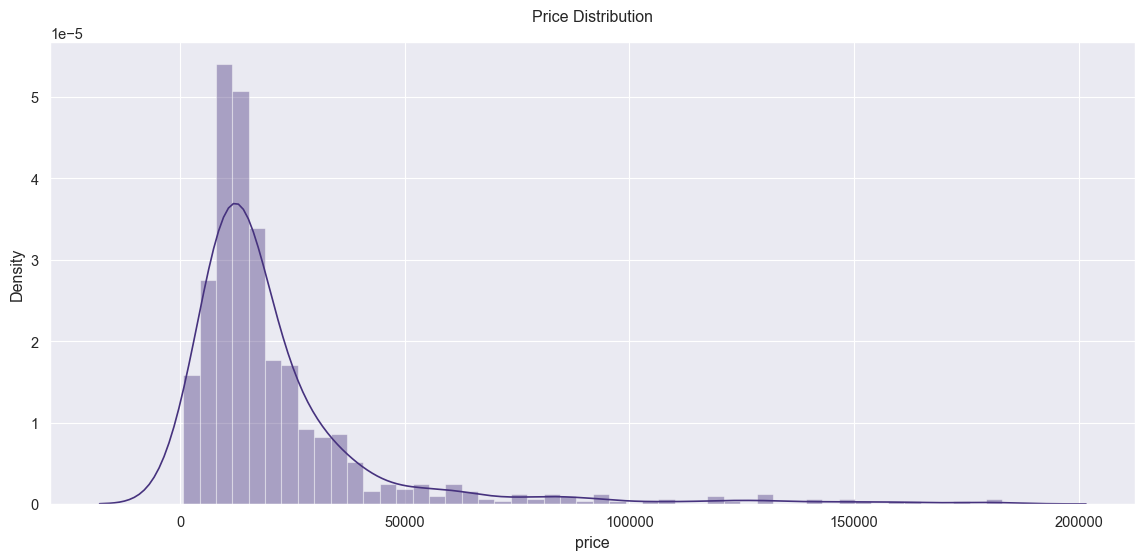

In [88]:
# distribution of 'price'

plt.figure(figsize = (14,6))
sns.distplot(data['price'])
plt.title('Price Distribution', pad = 15); 

_______
\- The distribution is right-skewed, with a long tail extending towards higher prices.
________
\- This indicates that while most prices are low, there are some significantly higher prices.
_______
\- We can do log transformation, to make price distribution about to be normal
________

In [89]:
data['price'] = np.log(data['price']) # log transformation

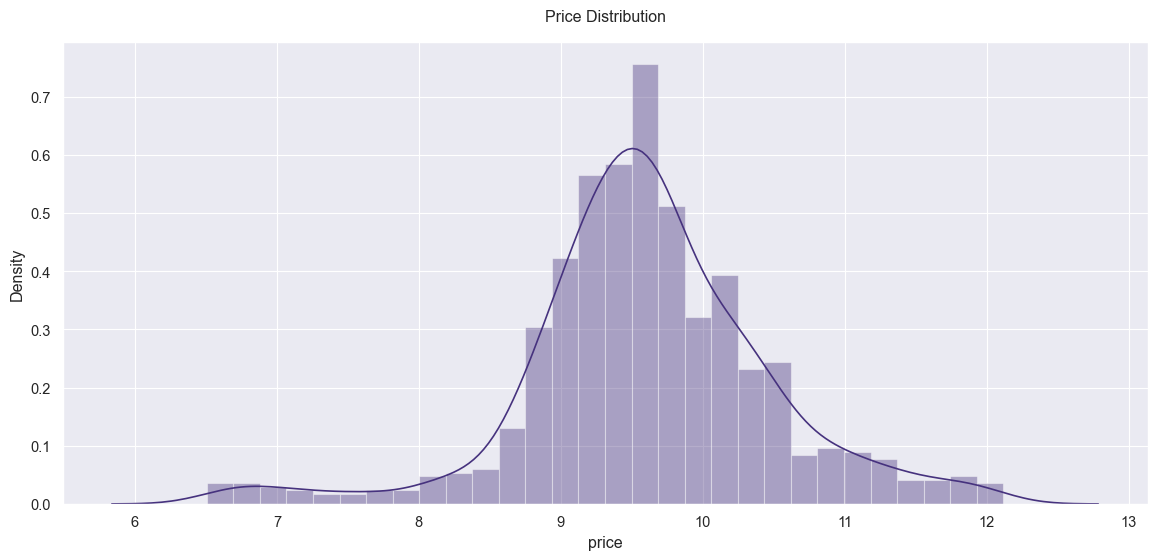

In [90]:
# distribution of 'price' after log transformation

plt.figure(figsize = (14,6))
sns.distplot(data['price'])
plt.title('Price Distribution', pad = 15); 

**Functions to visualize univariate and bivariate analysis of numerical and categorical features**

In [91]:
def num_distribution(feature):
    
    """
    Function to plot distribution of numerical feature
    """
    plt.figure(figsize = (14, 6))
    sns.histplot(data = data, x = feature, kde = True)
    plt.title(feature.title() +' Distribution', pad = 15)
    plt.xticks(rotation = 'vertical')
    plt.show()

In [92]:
def bivariate_with_numerical(feature):
    
    """
    Function to plot scatterplot for bivariate analysis
    """
    plt.figure(figsize = (14, 6))
    sns.scatterplot(data = data, x = feature, y = 'price')
    plt.title(feature.title()  + ' & Price', pad = 15)
    plt.show()

In [93]:
def cat_distribution(feature):
    
    """
    Function to plot distribution of categorical feature
    """
    plt.figure(figsize = (14, 6))
    sns.countplot(data = data, x = feature)
    plt.title(feature.title() +' Distribution', pad = 15)
    plt.xticks(rotation = 'vertical')
    plt.show()

In [94]:
def bivariate_with_catgorical(feature):
    
    '''
    Function to plot barplot for bivariate analysis
    '''
    plt.figure(figsize = (14, 6))
    sns.barplot(x = data[feature], y = data['price'], errorbar = None)
    plt.title(feature.title()  + ' & Price', pad = 15)
    plt.xticks(rotation = 'vertical')
    plt.show();

________

**company**

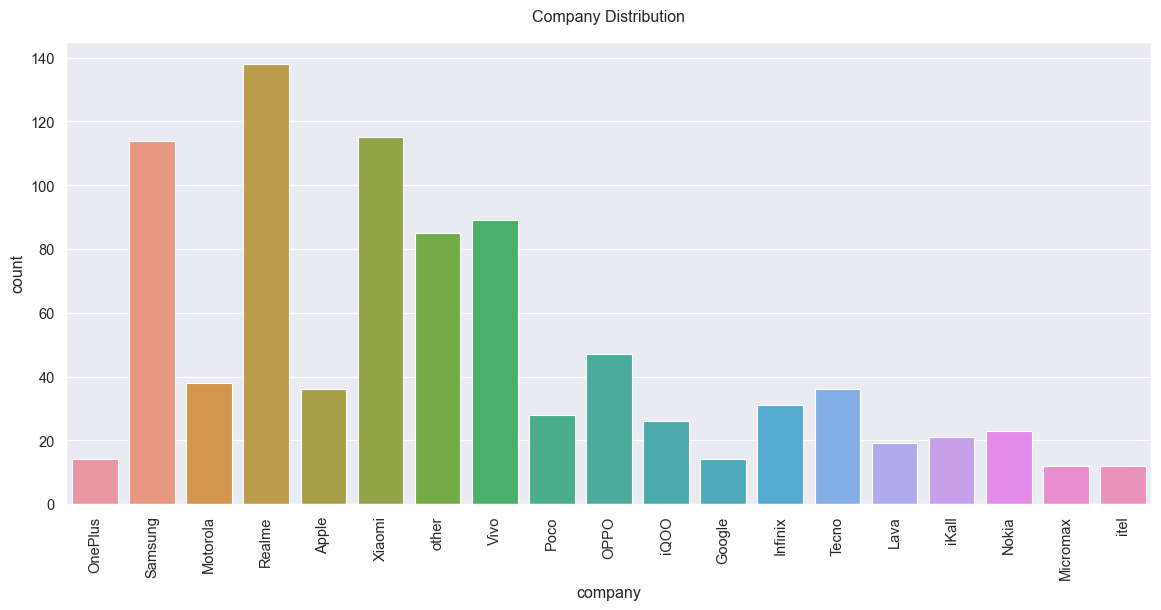

In [95]:
cat_distribution('company') # Distribution of 'company'

\- Realme has the highest count, with approximately 140 items.
______
\- Samsung and Xiaomi also have high counts, with Samsung around 110 and Xiaomi around 100.
______
\- Vivo and other categories have counts close to 90.
______
\- Apple and Motorola have moderate counts, with Apple around 60 and Motorola around 50.
______

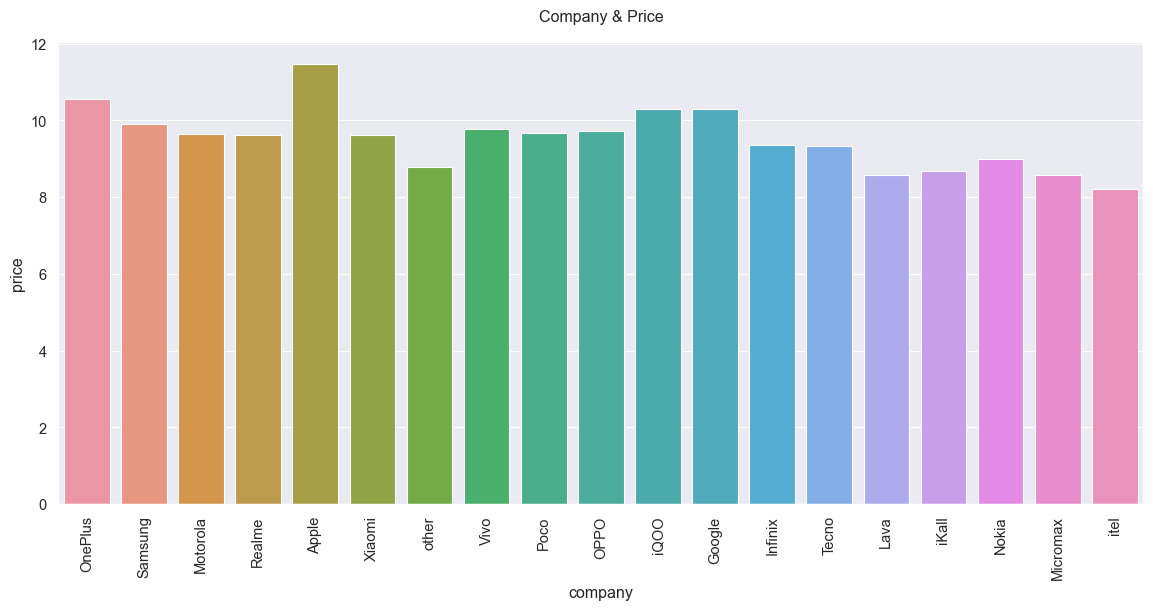

In [96]:
bivariate_with_catgorical('company') # Bivariate analysis with price

\- Apple has the highest price, exceeding 100,000. 
_____
\- Most other companies have prices ranging from around 20,000 to 50,000. 
______
\- OnePlus, iQOO, and Google have relatively higher prices compared to other brands.
______

**sim_count**

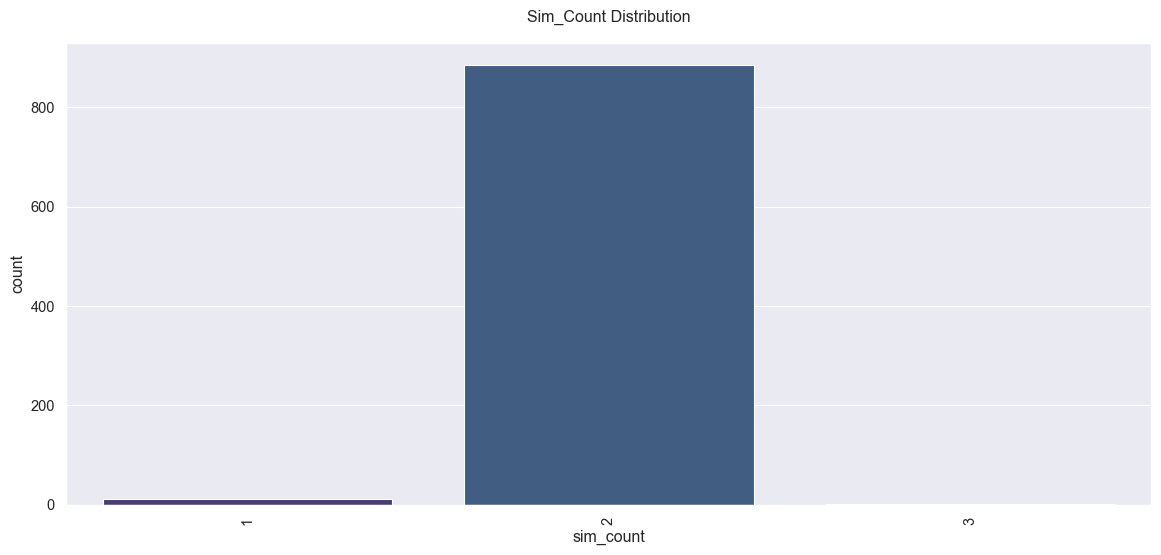

In [97]:
cat_distribution('sim_count') # Distribution of 'sim_count'

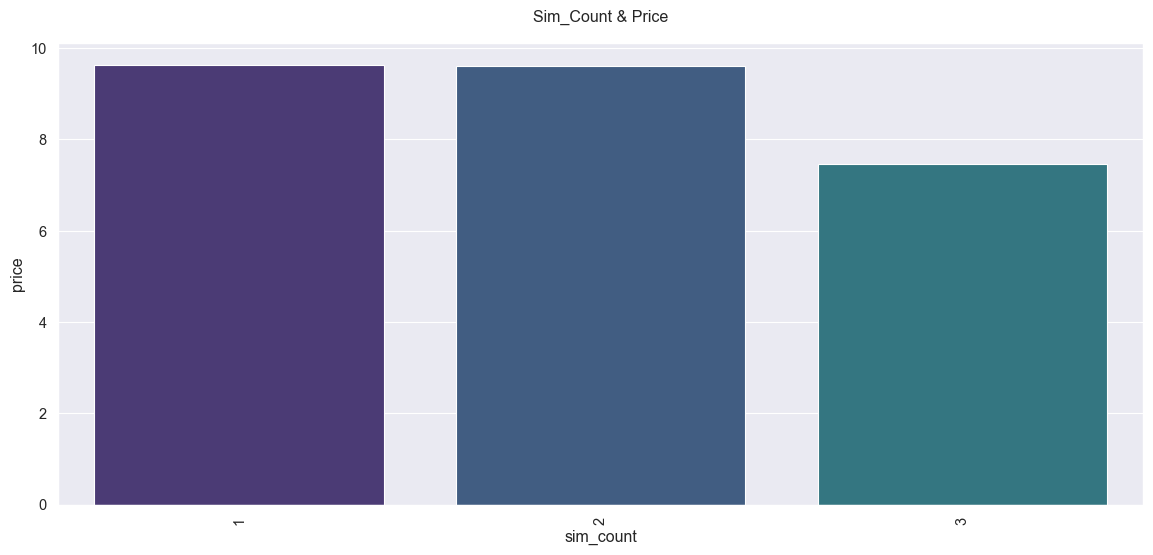

In [98]:
bivariate_with_catgorical('sim_count') # Relation of 'sim_count' with 'price'

_____
\- Devices with 2 SIM cards have the highest price, followed by those with 1 SIM card, and devices with 3 SIM cards have the lowest price.
____

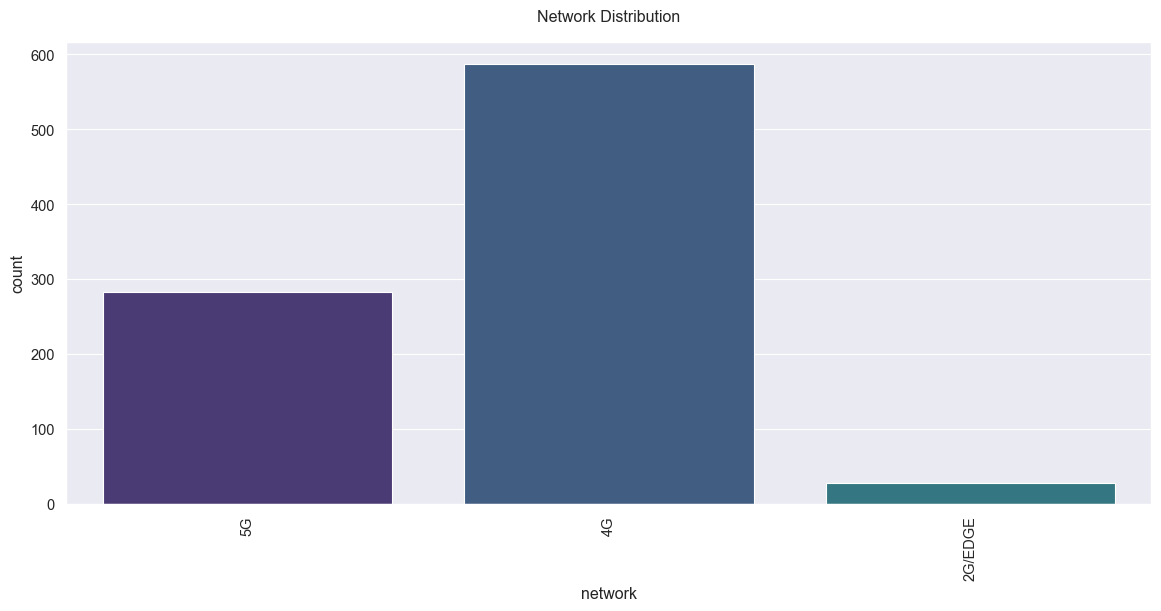

In [99]:
cat_distribution('network') # Distribution of 'network' column

_____
\- the 4G network has the highest count, followed by the 5G network, and the 2G/EDGE network has the lowest count.
_____

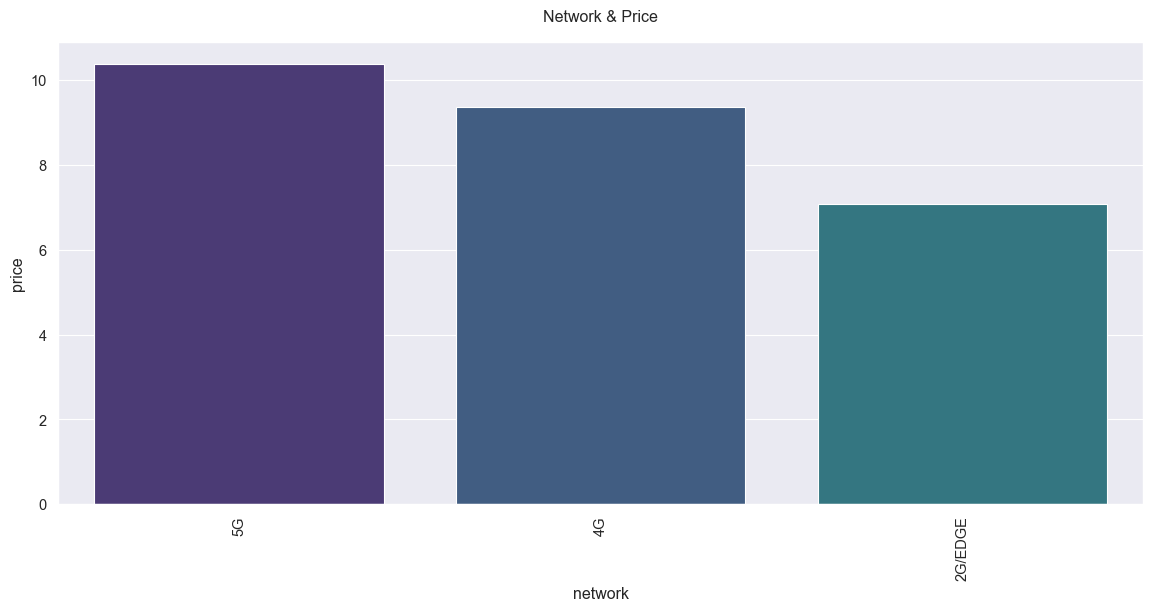

In [100]:
bivariate_with_catgorical('network') # bivariate analysis with 'price'

______
\- the price increases with the advancement in network technology, with 5G being the most expensive and 2G/EDGE being the least expensive.
______

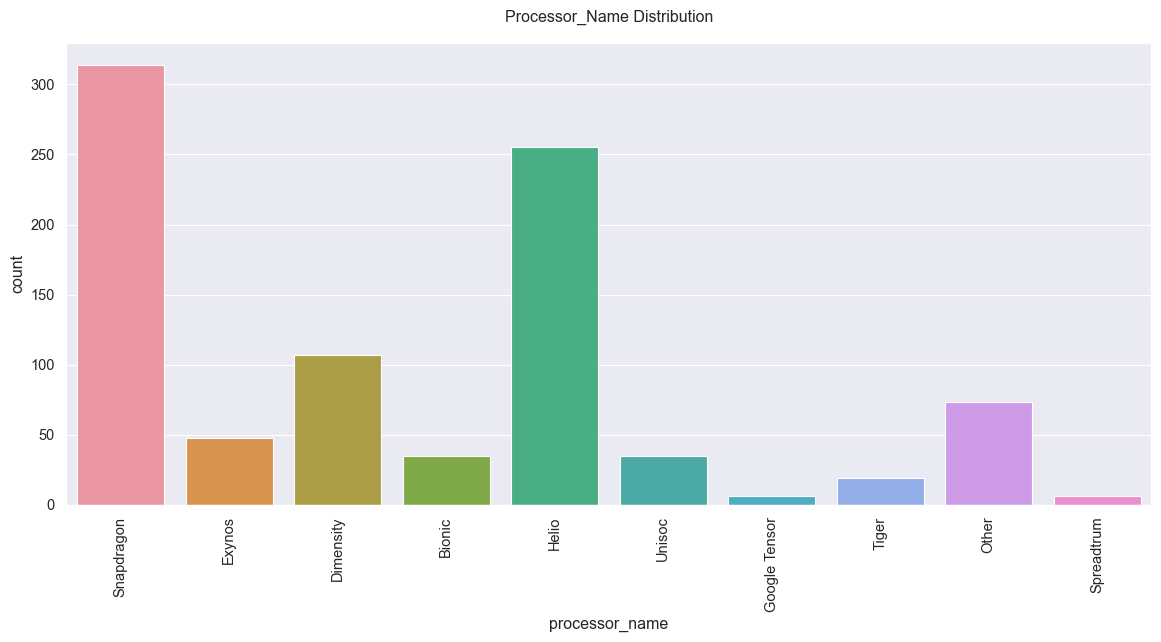

In [101]:
cat_distribution('processor_name') # Distribution of 'processor_name' column

________
\- Snapdragon is the most prevalent processor, followed by Helio and Dimensity, while Spreadtrum is the least common.
________

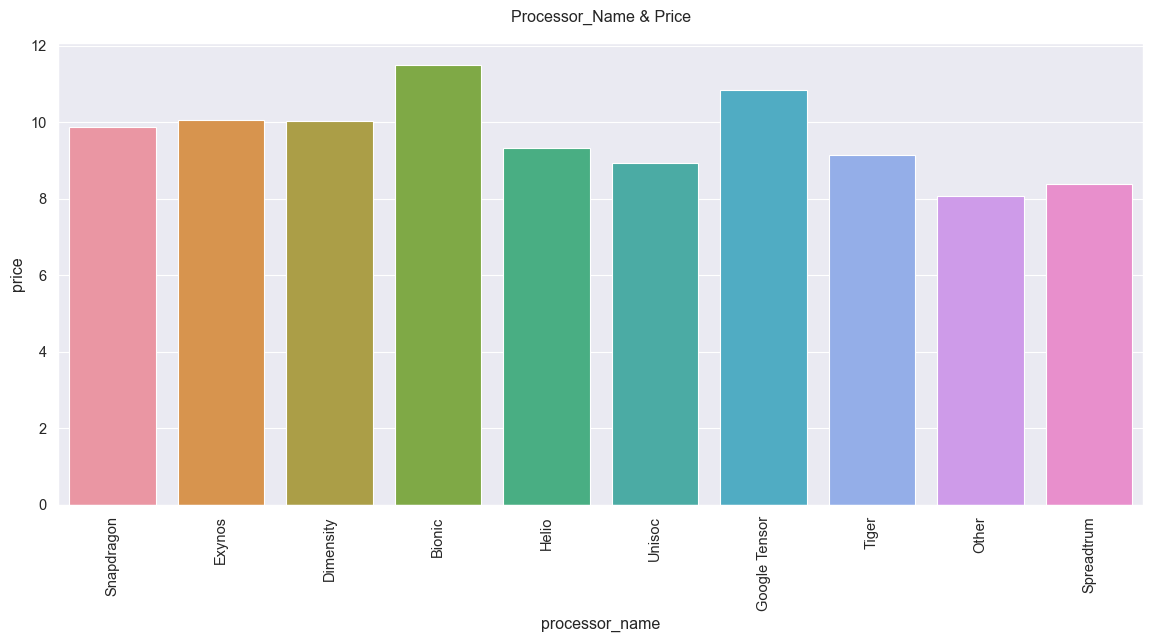

In [102]:
bivariate_with_catgorical('processor_name') # bivariate analysis with price

______
\- The Bionic processor has the highest price point at nearly 100,000, indicating its premium status for high-end devices. 
____
\- The Google Tensor processor is also in the higher price range at around 60,000. 
____
\- Other processors, such as Snapdragon and Exynos, are priced lower, ranging from 20,000 to 40,000.
______

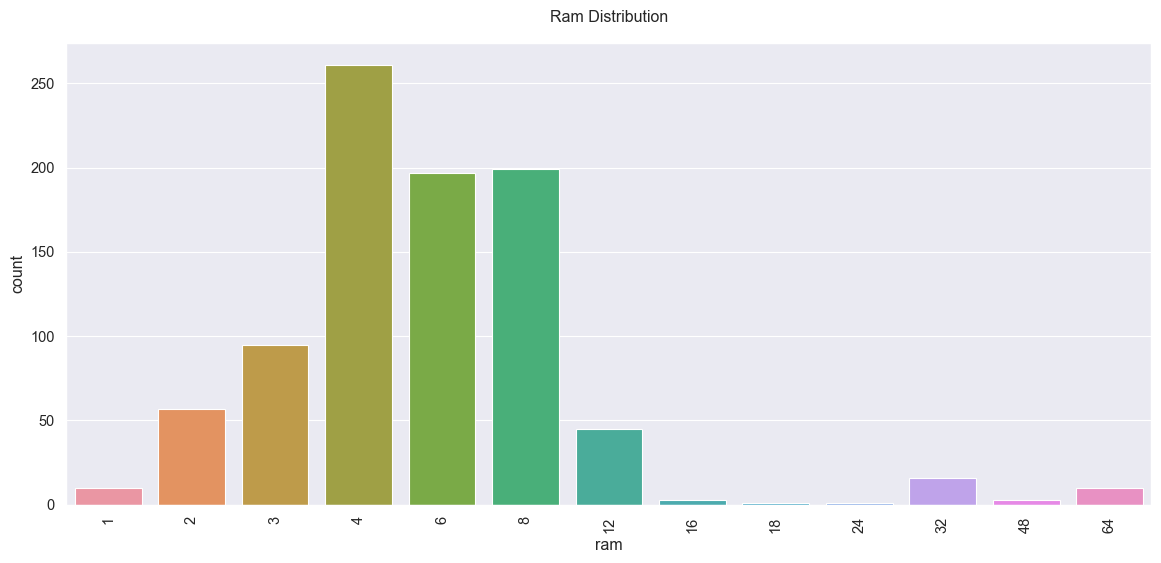

In [103]:
cat_distribution('ram') # Distribution of 'ram' column

_________
\- The most common RAM sizes are 4 GB, 6 GB, and 8 GB.
_______
\- RAM sizes of 1 GB, 16 GB, 18 GB, 24 GB, and 48 GB are the least common.
_________
\- There is a significant drop in the count of devices as the RAM size increases beyond 8 GB, with a slight increase at 32 GB and 64 GB.
_______

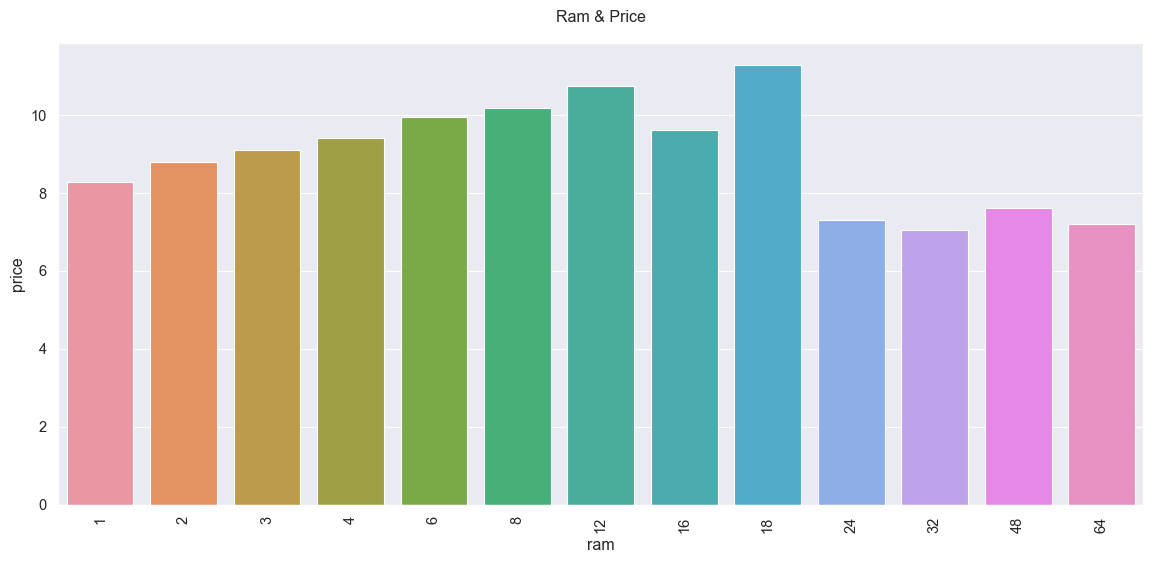

In [104]:
bivariate_with_catgorical('ram') # bivariate analysis with price

_____
\- The price for 1 GB of RAM is the lowest.
_______
\- There is a gradual increase in price from 2 GB to 8 GB of RAM.
________
\- A significant price jump is observed at 12 GB and 18 GB of RAM, with 18 GB having the highest price.
___________
\- After 18 GB, the prices drop significantly for 24 GB, 32 GB, 48 GB, and 64 GB of RAM.
________
\- The price does not increase linearly with the increase in RAM size. Instead, there are specific RAM sizes (notably 18 GB) that have a disproportionately higher price compared to others.
________

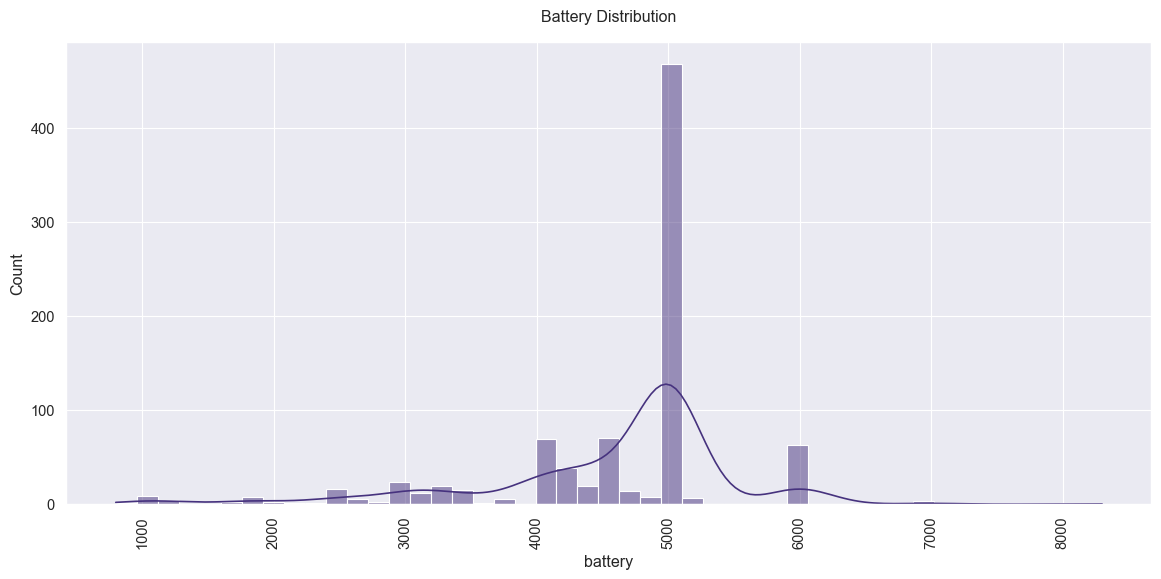

In [105]:
num_distribution('battery') # Distribution of 'battery' column

_____
\- The distribution is highly skewed towards a specific battery capacity around 5000 units, which has the highest count, exceeding 400.
_______
\- There are smaller peaks around 4000 and 6000 units.
______
\- The distribution shows a long tail with lower frequencies for battery capacities below 3000 and above 6000 units.
______

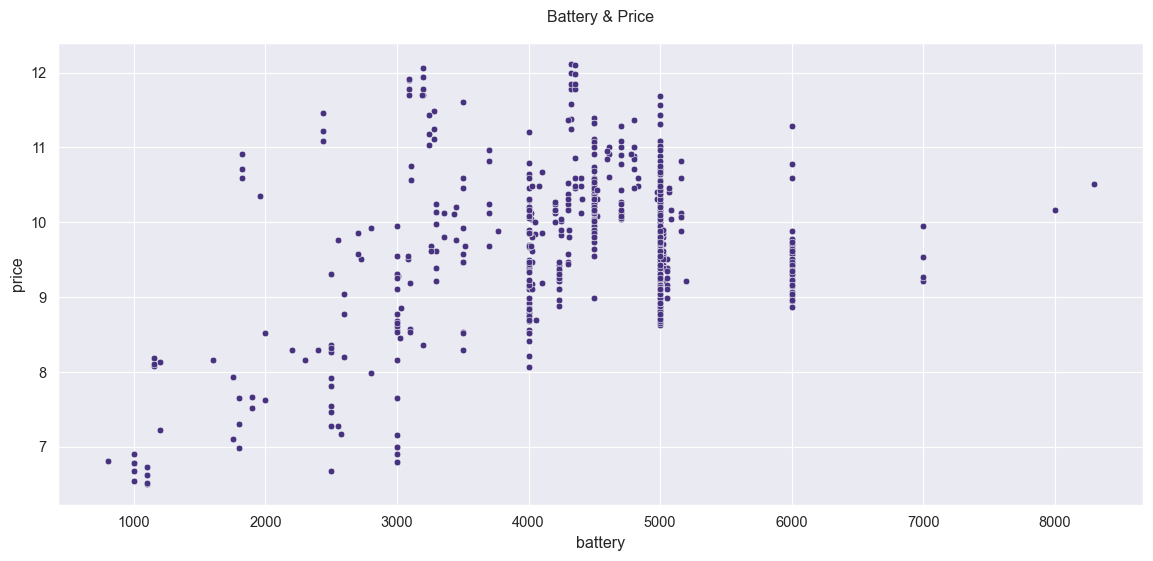

In [106]:
bivariate_with_numerical('battery') # bivariate analysis with price

______
\- While there is some clustering of data points at certain battery capacities, the price does not consistently increase or decrease with battery capacity. 
____________
\- The relationship between battery capacity and price appears to be complex and influenced by other factors.
______

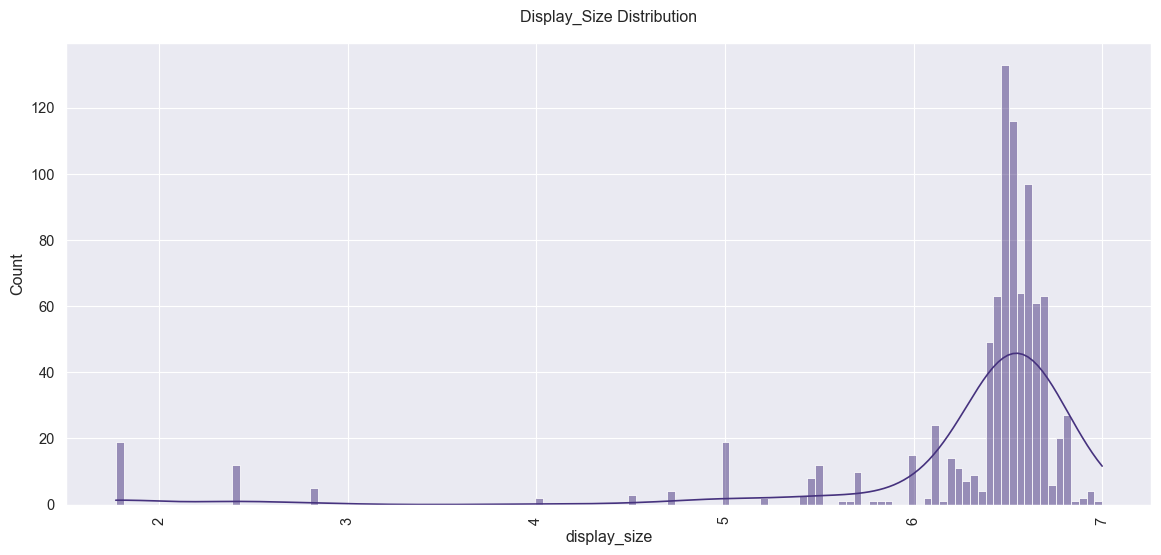

In [107]:
num_distribution('display_size')

__________

**display_pixel_1**

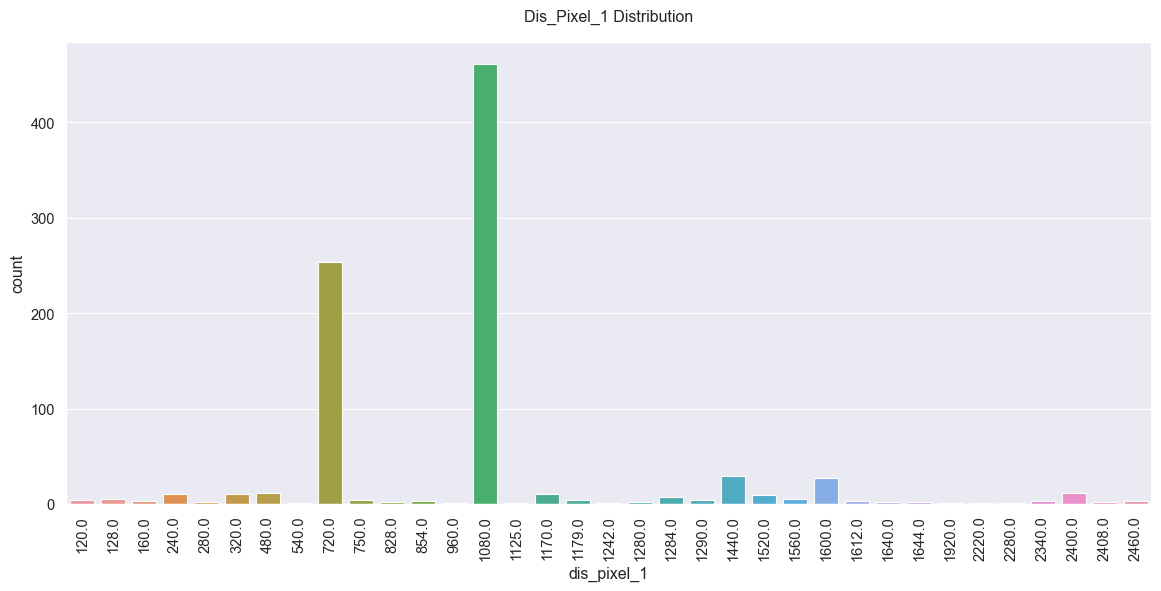

In [108]:
cat_distribution('dis_pixel_1')

________
\- The value 1080.0 has the highest frequency, with over 400 occurrences.
_____
\- The value 720.0 also has a significant frequency, with over 200 occurrences.
__________
\- Other values have much lower frequencies, with most of them having fewer than 50 occurrences.
________
\- There are several values with very low frequencies, indicating that they are relatively rare in the dataset.
______

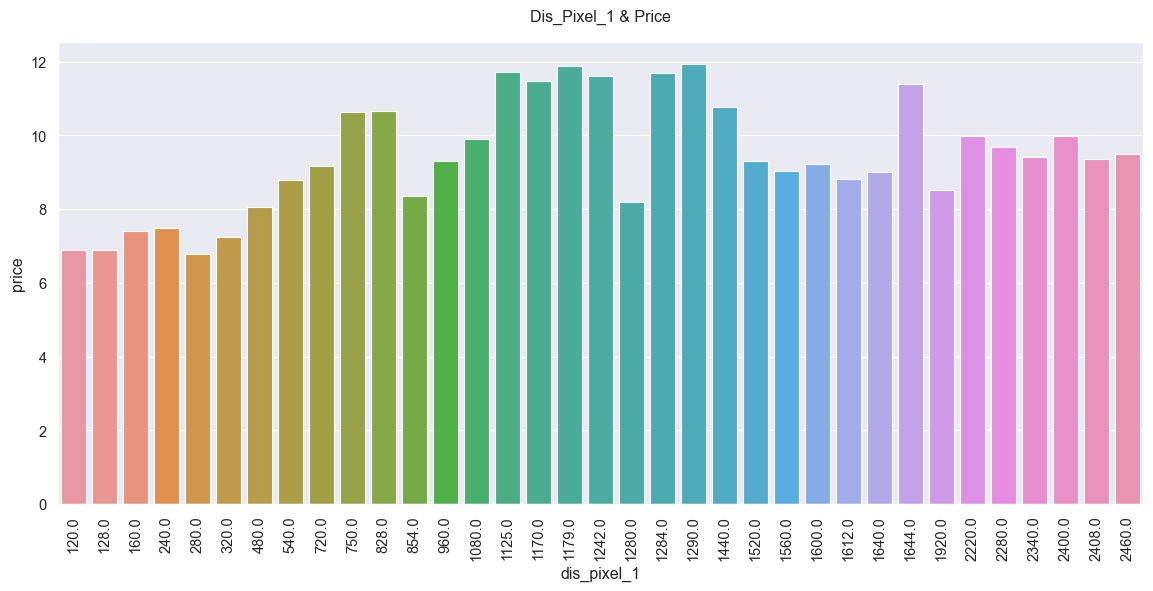

In [109]:
bivariate_with_catgorical('dis_pixel_1')

_____
\- The price generally increases with "Dis_Pixel_1" values up to around 1290.0, where it reaches a peak.
______
\- After 1290.0, the price tends to decrease slightly and then stabilizes with minor fluctuations.
_______
\- There is a noticeable peak at "Dis_Pixel_1" value 1644.0, where the price is higher compared to the surrounding values.
_______

**dis_pixel_2**

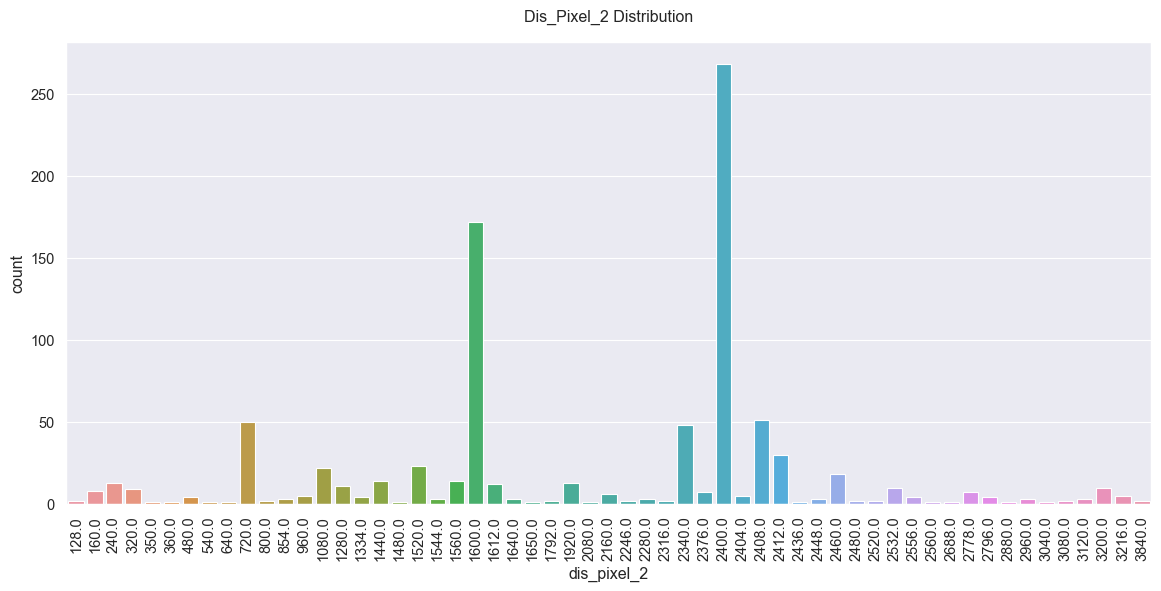

In [110]:
cat_distribution('dis_pixel_2')

______
\- The value 2400.0 has the highest frequency, with a count exceeding 250.
______
\- The value 1600.0 also has a significant frequency, with a count around 150.
__________
\- Other notable peaks include values like 720.0, 2448.0, and 2480.0, each with varying frequencies.
______
\- Many values have relatively low frequencies, indicating a sparse distribution across those values.
___

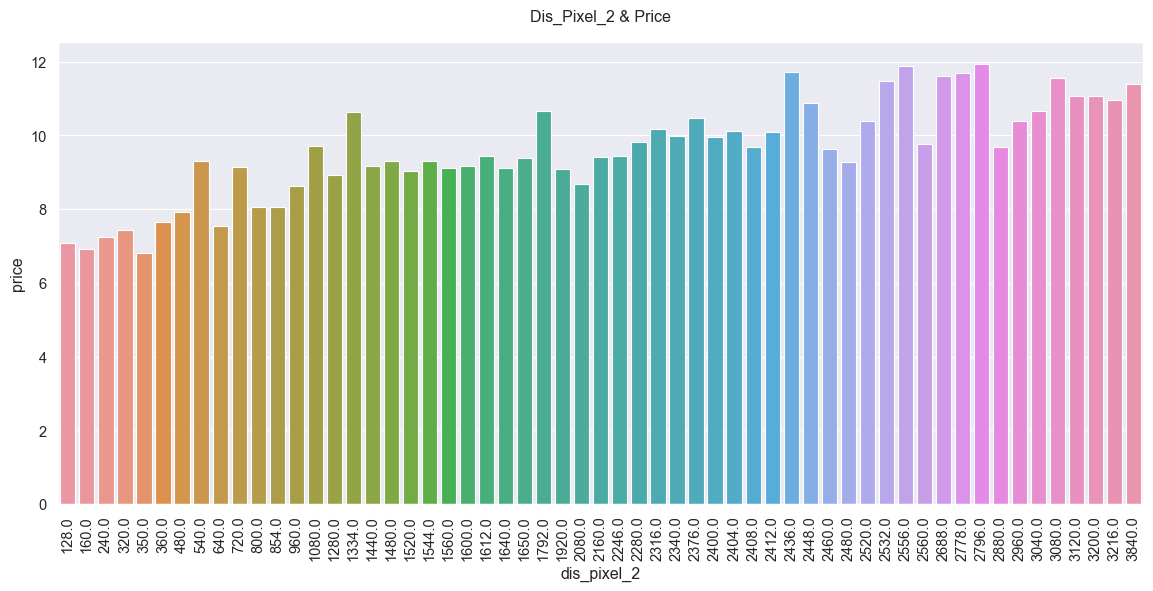

In [111]:
bivariate_with_catgorical('dis_pixel_2')

_____
\- The prices are relatively stable across different "Dis_Pixel_2" values, with most prices hovering around 8 to 10.
________
\- There are some variations, with a few "Dis_Pixel_2" values having prices slightly above 10
___

**camera**

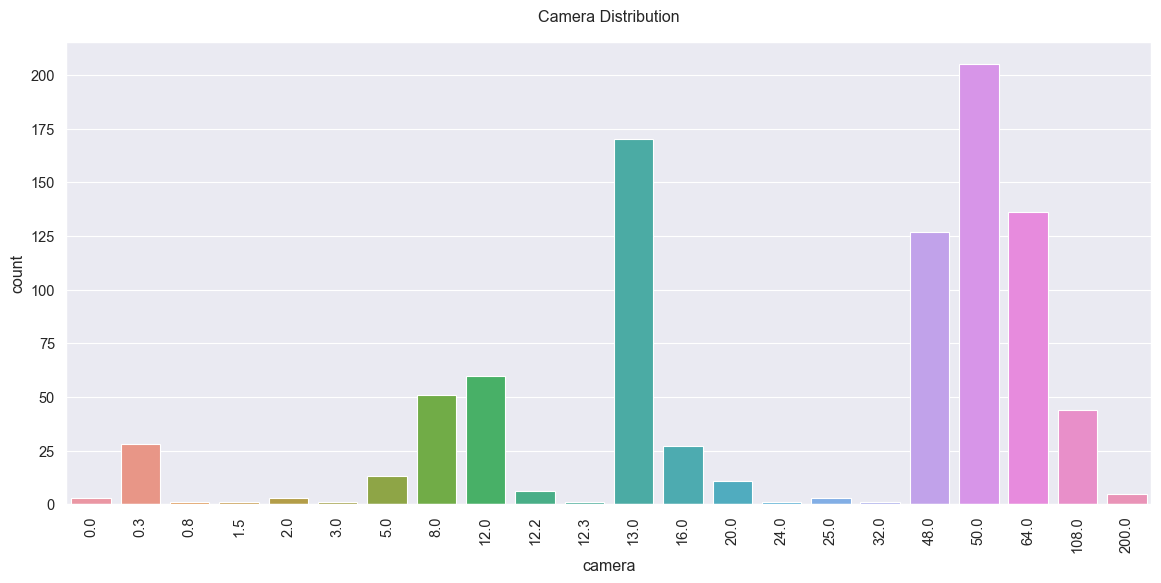

In [112]:
cat_distribution('camera')

______
\- The most common camera resolution is 50.0 MP, with a count close to 200.
____
\- Other popular resolutions include 13.0 MP and 48.0 MP, with counts around 125 and 100, respectively.
_____
\- Resolutions like 8.0 MP, 12.0 MP, and 64.0 MP also have notable counts.
_______
\- Some resolutions, such as 12.2 MP, 16.0 MP, 20.0 MP, 25.0 MP, 32.0 MP, and 200.0 MP, have relatively low counts.

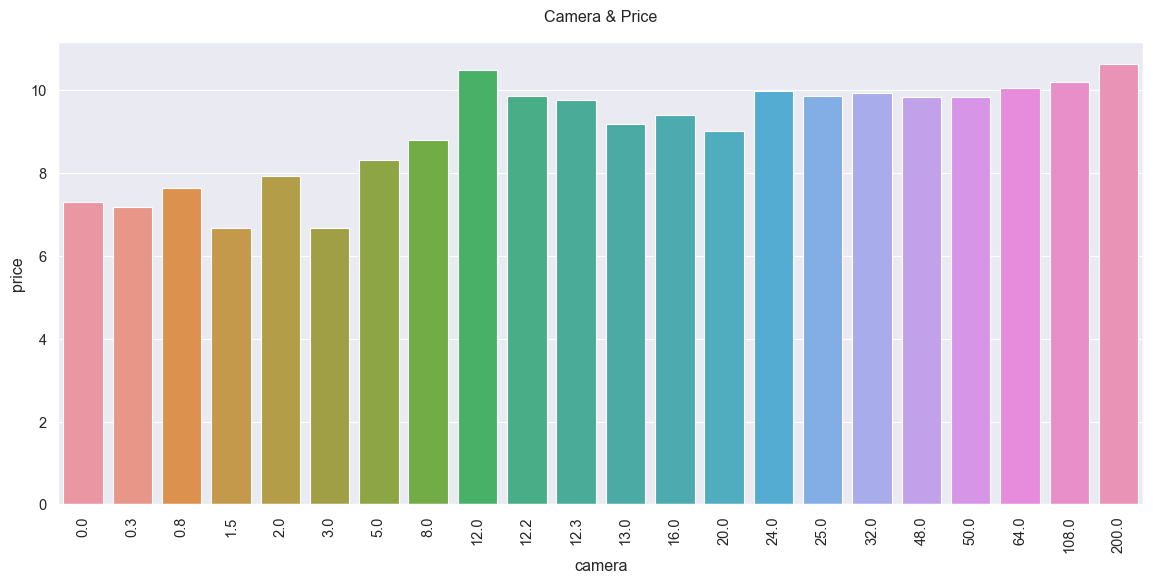

In [113]:
bivariate_with_catgorical('camera')

_________
\- Cameras with 12.0 MP and 12.2 MP have the highest prices, both reaching a value of 10.
__________
\- Cameras with 8.0 MP have the lowest price, with a value slightly above 8.
________
\- There is no clear linear relationship between the camera specifications and the price. 
_______
\- While some higher megapixel cameras have higher prices, others do not follow this trend.

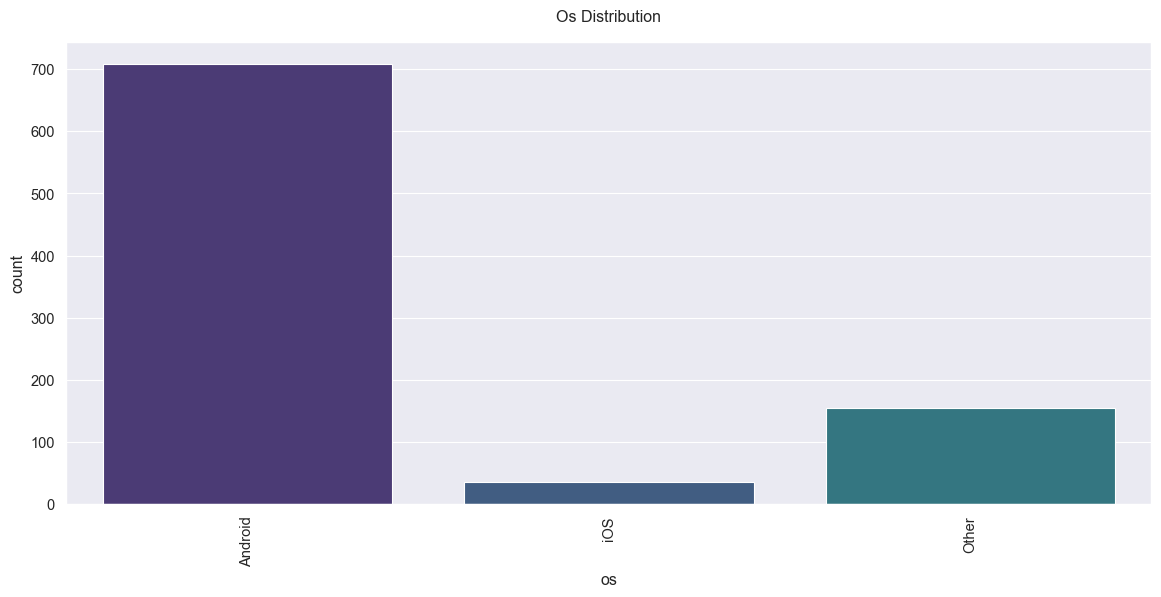

In [114]:
cat_distribution('os')

_______
\- The most prevalent OS among the three categories, followed by Other, and then iOS
___

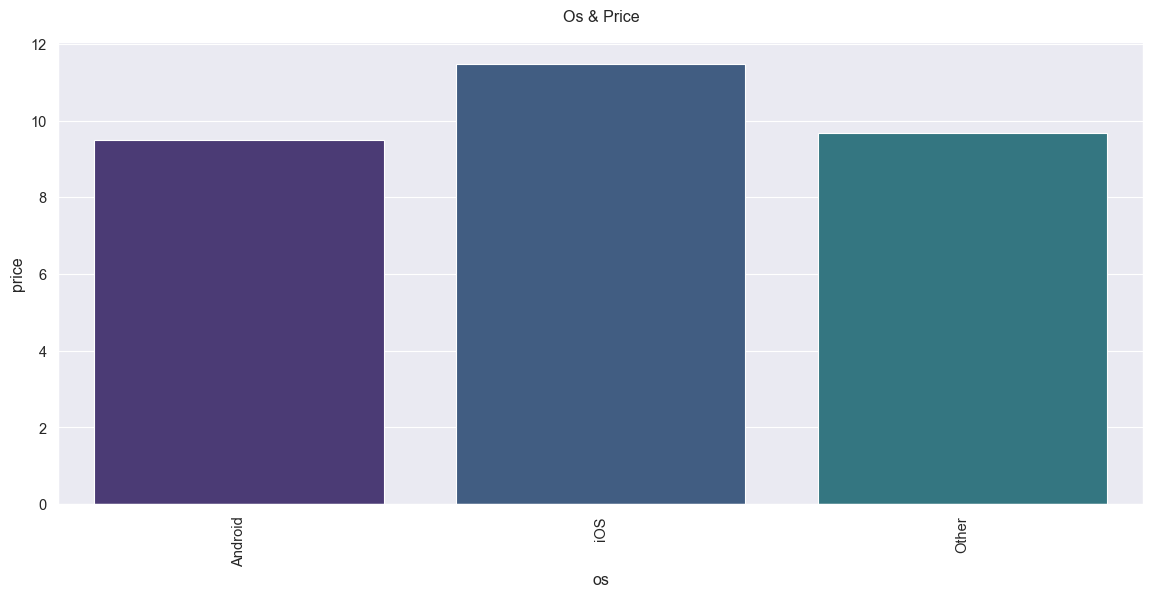

In [115]:
bivariate_with_catgorical('os')

________
\- The price for Android is approximately 9.
_________
\- The price for the "Other" category is slightly higher than Android, around 10.
_________
\- The price for iOS is the highest, close to 11.
______

### Model Building & Evaluation

In [116]:
# splitting data into X & y

X = data.drop(columns= ['price'])

y = data['price']

In [117]:
# splitting data into training & testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [118]:
# Feature Encoding

from sklearn.preprocessing import OneHotEncoder

features_to_encode = ['company', 'network', 'processor_name', 'os']
ohe = OneHotEncoder(sparse_output = False)  # Ensure the output is a dense array

X_train_encoded = ohe.fit_transform(X_train[features_to_encode])
X_test_encoded = ohe.transform(X_test[features_to_encode])

In [119]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trans = scaler.fit_transform(X_train_encoded)
X_test_trans = scaler.transform(X_test_encoded)

In [120]:
# evaluation metrics

from sklearn.metrics import r2_score, mean_absolute_error

In [121]:
def calculate_pmae(y_true, y_pred):  
    """  
    Calculate the Percentage Mean Absolute Error (PMAE).  

    Parameters:  
    y_true (list or array): Actual observed values.  
    y_pred (list or array): Predicted values.  

    Returns:  
    float: Percentage Mean Absolute Error value.  
    """  
    # Calculate Mean Absolute Error (MAE)  
    mae = mean_absolute_error(y_true, y_pred)  
    
    # Calculate the mean of the observed values  
    mean_observed = sum(y_true) / len(y_true)  
    
    # Calculate PMAE  
    pmae = (mae / mean_observed) * 100  
    
    return pmae  

In [122]:
def evaluate_model(model):
    
    y_pred_test = model.predict(X_test_trans) # y_pred test
    y_pred_train = model.predict(X_train_trans) # y_pred train
    
    print('\n',type(model).__name__) # name of model
    print('======'*10)
    print()
    
    print('R2 score (Train) : ', r2_score(y_train, y_pred_train)) # r2 score on train
    print('R2 score (Test) : ', r2_score(y_test, y_pred_test)) # r2 score on test
    print('______'*10)
    print()
    
    print('Mean Absolute Error (Train) : ', mean_absolute_error(y_train, y_pred_train)) # mae on train
    print('Mean Absolute Error (Test) : ', mean_absolute_error(y_test, y_pred_test)) # mae on test
    print('______'*10)
    print()
    
    print('Percentage Mean Absolute Error (Train) : ', calculate_pmae(y_train, y_pred_train)) # pmae on train
    print('Percentage Mean Absolute Error (Test) : ', calculate_pmae(y_test, y_pred_test)) # pmae on test
    print('______'*10) 
    print()

In [123]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [124]:
evaluate_model(lr)


 LinearRegression

R2 score (Train) :  0.787705354969472
R2 score (Test) :  0.7905299128372377
____________________________________________________________

Mean Absolute Error (Train) :  0.3068608554900678
Mean Absolute Error (Test) :  0.27814071342905616
____________________________________________________________

Percentage Mean Absolute Error (Train) :  3.1950379138267966
Percentage Mean Absolute Error (Test) :  2.8921607507619513
____________________________________________________________



In [125]:
# Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_trans, y_train)

Ridge()

In [126]:
evaluate_model(ridge)


 Ridge

R2 score (Train) :  0.792144262411897
R2 score (Test) :  0.7952290923291824
____________________________________________________________

Mean Absolute Error (Train) :  0.3012279459406628
Mean Absolute Error (Test) :  0.27222394904402314
____________________________________________________________

Percentage Mean Absolute Error (Train) :  3.1363880102841515
Percentage Mean Absolute Error (Test) :  2.83063709421081
____________________________________________________________



In [127]:
# Lasso

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_trans, y_train)

Lasso()

In [128]:
evaluate_model(lasso)


 Lasso

R2 score (Train) :  0.0
R2 score (Test) :  -0.0002549424974411796
____________________________________________________________

Mean Absolute Error (Train) :  0.632621030652669
Mean Absolute Error (Test) :  0.5653519809696538
____________________________________________________________

Percentage Mean Absolute Error (Train) :  6.586855709541236
Percentage Mean Absolute Error (Test) :  5.878638871554501
____________________________________________________________



In [129]:
# Elastic Net

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(X_train_trans, y_train)

ElasticNet()

In [130]:
evaluate_model(elastic_net)


 ElasticNet

R2 score (Train) :  0.03494999823627243
R2 score (Test) :  0.03571139798995726
____________________________________________________________

Mean Absolute Error (Train) :  0.6170304750927892
Mean Absolute Error (Test) :  0.5502668093636228
____________________________________________________________

Percentage Mean Absolute Error (Train) :  6.424526708561666
Percentage Mean Absolute Error (Test) :  5.721780349479128
____________________________________________________________



In [131]:
# Support Vector Regression

from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_trans, y_train)

SVR()

In [132]:
evaluate_model(svr)


 SVR

R2 score (Train) :  0.8447714825453062
R2 score (Test) :  0.7970312627461168
____________________________________________________________

Mean Absolute Error (Train) :  0.2519990824223367
Mean Absolute Error (Test) :  0.274843503123099
____________________________________________________________

Percentage Mean Absolute Error (Train) :  2.6238166523490967
Percentage Mean Absolute Error (Test) :  2.8578757224526052
____________________________________________________________



In [133]:
# KNN 

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train_trans, y_train)

KNeighborsRegressor()

In [134]:
evaluate_model(knn)


 KNeighborsRegressor

R2 score (Train) :  0.8184157258061237
R2 score (Test) :  0.7743619332627261
____________________________________________________________

Mean Absolute Error (Train) :  0.2854403817523276
Mean Absolute Error (Test) :  0.2885460551174948
____________________________________________________________

Percentage Mean Absolute Error (Train) :  2.9720077537403586
Percentage Mean Absolute Error (Test) :  3.0003574993017703
____________________________________________________________



In [135]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train_trans, y_train)

DecisionTreeRegressor()

In [136]:
evaluate_model(dt)


 DecisionTreeRegressor

R2 score (Train) :  0.8690259041006843
R2 score (Test) :  0.8163847067187598
____________________________________________________________

Mean Absolute Error (Train) :  0.24113859607113436
Mean Absolute Error (Test) :  0.267299647500796
____________________________________________________________

Percentage Mean Absolute Error (Train) :  2.51073717338045
Percentage Mean Absolute Error (Test) :  2.779433257589205
____________________________________________________________



In [137]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train_trans, y_train)

RandomForestRegressor()

In [138]:
evaluate_model(rf)


 RandomForestRegressor

R2 score (Train) :  0.8658292005087238
R2 score (Test) :  0.8163726747476523
____________________________________________________________

Mean Absolute Error (Train) :  0.24771832185573028
Mean Absolute Error (Test) :  0.2680254465304393
____________________________________________________________

Percentage Mean Absolute Error (Train) :  2.579245335852963
Percentage Mean Absolute Error (Test) :  2.7869802557995587
____________________________________________________________



In [139]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()

gb.fit(X_train_trans, y_train)

GradientBoostingRegressor()

In [140]:
evaluate_model(gb)


 GradientBoostingRegressor

R2 score (Train) :  0.8444895959086827
R2 score (Test) :  0.8079084579975095
____________________________________________________________

Mean Absolute Error (Train) :  0.2647800305068453
Mean Absolute Error (Test) :  0.27311616480511985
____________________________________________________________

Percentage Mean Absolute Error (Train) :  2.756891995697928
Percentage Mean Absolute Error (Test) :  2.839914525672182
____________________________________________________________



In [141]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                             max_depth=5, alpha=10, n_estimators=100)

xgb_model.fit(X_train_trans, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [142]:
evaluate_model(xgb_model)


 XGBRegressor

R2 score (Train) :  0.7891541285544879
R2 score (Test) :  0.7836291047965649
____________________________________________________________

Mean Absolute Error (Train) :  0.30750201319453513
Mean Absolute Error (Test) :  0.2871500355884878
____________________________________________________________

Percentage Mean Absolute Error (Train) :  3.2017136534588317
Percentage Mean Absolute Error (Test) :  2.985841419151853
____________________________________________________________



___
We are going to apply grid search cv to HyperTune and Cross Validate some models, like Decision Tree, Random Forest & XG Boost
_____

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
# GridSearch CV (Decision Tree)

param_grid_decision_tree_regression = {  
    'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    'splitter': ['best', 'random'],  
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2']  }

grid_search_dt = GridSearchCV(dt, param_grid_decision_tree_regression, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)  
grid_search_dt.fit(X_train_trans, y_train) 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [145]:
# best parameters

grid_search_dt.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [146]:
# GridSearch CV (Random Forest)

param_grid_random_forest = {  
    'n_estimators': [100, 200, 300],  
    'criterion': ['squared_error'],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False]  } 

grid_search_rf = GridSearchCV(rf, param_grid_random_forest, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)  
grid_search_rf.fit(X_train_trans, y_train) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [147]:
grid_search_rf.best_params_

{'bootstrap': False,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [148]:
# GridSearch CV (XG Boost)

param_grid_xgboost = {  
    'n_estimators': [100, 200],  
    'learning_rate': [0.01, 0.1],  
    'max_depth': [3, 5],  
    'min_child_weight': [1, 3],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0],  
    'gamma': [0, 0.1],  
    'reg_alpha': [0, 0.1],  
    'reg_lambda': [1, 1.5]  }

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgboost, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1)  
grid_search_xgb.fit(X_train_trans, y_train) 

GridSearchCV(cv=5,
             estimator=XGBRegressor(alpha=10, base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.3,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rat...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'reg_alpha': [0, 0.1], 'reg_lambda': [1, 1.5],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

In [149]:
grid_search_xgb.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 200,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8}

_________

In [150]:
# Perform cross-validation 

from sklearn.model_selection import cross_val_score

def cross_validation(model):
    cv_scores = cross_val_score(dt_best, X_train_trans, y_train, cv = 5, scoring = 'neg_mean_absolute_error')
    mae_scores = - cv_scores
    
    print('\n',type(model).__name__) # name of model
    print('====='*10)
    
    print("Cross-Validation MAE Scores:", mae_scores) 
    print('-----'*10)
    print("Mean MAE:", np.mean(mae_scores))  
    print('-----'*10)
    print("Standard Deviation of MSE:", np.std(mae_scores))  

_________

**Retraining model with best parameters**

In [151]:
# Decision Tree

dt_best = DecisionTreeRegressor(criterion = 'squared_error',max_depth = 40, max_features =  'log2',
                                min_samples_leaf = 1, min_samples_split = 2, splitter =  'best')

dt_best.fit(X_train_trans, y_train)

DecisionTreeRegressor(max_depth=40, max_features='log2')

In [152]:
evaluate_model(dt_best)


 DecisionTreeRegressor

R2 score (Train) :  0.8690259041006843
R2 score (Test) :  0.8148165607631367
____________________________________________________________

Mean Absolute Error (Train) :  0.24113859607113428
Mean Absolute Error (Test) :  0.2685142221795149
____________________________________________________________

Percentage Mean Absolute Error (Train) :  2.5107371733804498
Percentage Mean Absolute Error (Test) :  2.792062639211742
____________________________________________________________



In [153]:
cross_validation(dt_best)


 DecisionTreeRegressor
Cross-Validation MAE Scores: [0.31849014 0.25623516 0.2954983  0.30056942 0.31325314]
--------------------------------------------------
Mean MAE: 0.2968092312873242
--------------------------------------------------
Standard Deviation of MSE: 0.021920660625643185


In [154]:
# Random Forest

rf_best = RandomForestRegressor(bootstrap = True, criterion = 'squared_error', max_depth =  None,
                                max_features =  'sqrt', min_samples_leaf = 1, min_samples_split = 2,
                                n_estimators = 200)

rf_best.fit(X_train_trans, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=200)

In [155]:
evaluate_model(rf_best)


 RandomForestRegressor

R2 score (Train) :  0.8668573428997524
R2 score (Test) :  0.8153989459682413
____________________________________________________________

Mean Absolute Error (Train) :  0.24662334148990245
Mean Absolute Error (Test) :  0.26947276047423174
____________________________________________________________

Percentage Mean Absolute Error (Train) :  2.5678443906977764
Percentage Mean Absolute Error (Test) :  2.8020297051615795
____________________________________________________________



In [156]:
cross_validation(rf_best)


 RandomForestRegressor
Cross-Validation MAE Scores: [0.28666706 0.25010881 0.31289538 0.30850438 0.30959958]
--------------------------------------------------
Mean MAE: 0.2935550418912748
--------------------------------------------------
Standard Deviation of MSE: 0.023621931735914387


In [157]:
# XG Boost

xgb_model_best = xgb.XGBRegressor(colsample_bytree = 0.8, gamma = 0, learning_rate = 0.1,
                                  max_depth = 5, min_child_weight = 1, n_estimators = 100,
                                  reg_alpha = 0.1, reg_lambda = 1.5, subsample = 1.0)

xgb_model_best.fit(X_train_trans, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [158]:
evaluate_model(xgb_model_best)


 XGBRegressor

R2 score (Train) :  0.8618901267039727
R2 score (Test) :  0.8186938079266788
____________________________________________________________

Mean Absolute Error (Train) :  0.2515247432971372
Mean Absolute Error (Test) :  0.2659072952555712
____________________________________________________________

Percentage Mean Absolute Error (Train) :  2.618877829224839
Percentage Mean Absolute Error (Test) :  2.7649553105629368
____________________________________________________________



In [159]:
cross_validation(xgb_model_best)


 XGBRegressor
Cross-Validation MAE Scores: [0.30023004 0.25361853 0.30732076 0.33262993 0.31583127]
--------------------------------------------------
Mean MAE: 0.30192610338361525
--------------------------------------------------
Standard Deviation of MSE: 0.026463859056432226


________
**\- By examining the cross-validation results of the top-performing model, we can conclude that XGBoost is consistently performing well, with a standard deviation of 0.02.**
______

**\- We will use XGBoost for prediction.**
________

In [160]:
# feature encoding : 'company', 'network', 'processor_name', 'os'
# log transformation: 'price'
# scaling : all

In [161]:
data.head()

,company,sim_count,network,processor_name,ram,battery,display_size,dis_pixel_1,dis_pixel_2,camera,os,price
0,OnePlus,2,5G,Snapdragon,6,5000.0,6.59,1080.0,2412.0,64.0,Android,9.852142
1,Samsung,2,5G,Exynos,4,5000.0,6.60,1080.0,2408.0,50.0,Android,9.711055
2,Samsung,2,5G,Snapdragon,6,5000.0,6.60,1080.0,2408.0,50.0,Android,9.740910
3,Motorola,2,5G,Snapdragon,6,5000.0,6.55,1080.0,2400.0,50.0,Android,9.615739
4,Realme,2,5G,Dimensity,6,5000.0,6.70,1080.0,2412.0,108.0,Android,10.126591


In [162]:
# pipeline

In [163]:
# spliting into X, y

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

features_to_encode = ['company', 'network', 'processor_name', 'os']

# defining transformers

categorical_transformer = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

# making column transformer

preprocessor = ColumnTransformer(
    transformers = [ ('categorical_trans', categorical_transformer, features_to_encode)], 
    remainder = 'passthrough')

# model training

model = xgb.XGBRegressor(colsample_bytree = 0.8,  
    learning_rate = 0.1,  
    max_depth = 5)

# making TransformedTargetRegressor object
from sklearn.compose import TransformedTargetRegressor 

target_regressor = TransformedTargetRegressor(regressor = model,  func = np.log1p, inverse_func = np.expm1)         

# Create a pipeline that includes preprocessing, scaling, and the regressor with target transformation  

pipe = Pipeline( steps = [  
    ('preprocessor', preprocessor),  
    ('scaler', StandardScaler()),  
    ('regressor', target_regressor)  
])  

pipe.fit(X_train, y_train)

# saving the pipe object

import joblib

joblib.dump(pipe, 'xgb_regressor_pipeline.joblib')

['xgb_regressor_pipeline.joblib']

In [164]:
# List of categorical features  
features_to_encode = ['company', 'network', 'processor_name', 'os']  

# Before splitting, ensure categorical features are strings  
data[features_to_encode] = data[features_to_encode].astype(str)  

# Proceed with splitting the data  
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformers  
categorical_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  

# Create column transformer  
preprocessor = ColumnTransformer(  
    transformers=[('categorical_trans', categorical_transformer, features_to_encode)],  
    remainder='passthrough'  
)  

# Model training  
model = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=5)  

# Create TransformedTargetRegressor  
from sklearn.compose import TransformedTargetRegressor  

target_regressor = TransformedTargetRegressor(  
    regressor=model,  
    func=np.log1p,  
    inverse_func=np.expm1  
)  

# Create pipeline  
pipe = Pipeline(steps=[  
    ('preprocessor', preprocessor),  
    ('scaler', StandardScaler()),  
    ('regressor', target_regressor)  
])  

# Fit the pipeline  
pipe.fit(X_train, y_train)  

# Save the pipeline  
import joblib  
joblib.dump(pipe, 'xgb_regressor_pipeline.joblib')

['xgb_regressor_pipeline.joblib']

**loading pipeline**

```python

from joblib import load  

# Load the pipeline from the file  
loaded_pipe = load('xgb_regressor_pipeline.joblib')  


```

_____________

In [165]:
for column in data.columns:
    print(column, data[column].dtype)

company object
sim_count int64
network object
processor_name object
ram int32
battery float64
display_size float64
dis_pixel_1 float64
dis_pixel_2 float64
camera float64
os object
price float64


In [166]:
# Ensure necessary imports
import numpy as np
import joblib
import pandas as pd

# Sample input to test
array = ['Samsung', 2, '4G', 'Snapdragon', 6, 5000, 6.5, 1080, 2400, 64, 'Android']

# Convert the input array to a DataFrame
input_df = pd.DataFrame([array], columns=[
    'company', 'sim_count', 'network', 'processor_name', 'ram', 'battery', 
    'display_size', 'dis_pixel_1', 'dis_pixel_2', 'camera', 'os'
])

# Ensure data types match the expected types
input_df['sim_count'] = input_df['sim_count'].astype('int32')
input_df['ram'] = input_df['ram'].astype('int32')
input_df['battery'] = input_df['battery'].astype('int32')
input_df['dis_pixel_1'] = input_df['dis_pixel_1'].astype('int32')
input_df['dis_pixel_2'] = input_df['dis_pixel_2'].astype('int32')
input_df['camera'] = input_df['camera'].astype('int32')

# Predict using the model
prediction = pipe.predict(input_df)

# Print the prediction
print(np.exp(prediction[0]))

19260.953


In [167]:
for column in ['company', 'network', 'processor_name', 'os']:
    print(data[column].unique())
    print('*'*10)


['OnePlus' 'Samsung' 'Motorola' 'Realme' 'Apple' 'Xiaomi' 'other' 'Vivo'
 'Poco' 'OPPO' 'iQOO' 'Google' 'Infinix' 'Tecno' 'Lava' 'iKall' 'Nokia'
 'Micromax' 'itel']
**********
['5G' '4G' '2G/EDGE']
**********
['Snapdragon' 'Exynos' 'Dimensity' 'Bionic' 'Helio' 'Unisoc'
 'Google Tensor' 'Tiger' 'Other' 'Spreadtrum']
**********
['Android' 'iOS' 'Other']
**********


In [170]:
for column in data.columns :
    if column not in ['company', 'network', 'processor_name', 'os']:
        print(column)
        print(data[column].max())
        print(data[column].min())

sim_count
3
1
ram
64
1
battery
8300.0
800.0
display_size
7.0
1.77
dis_pixel_1
2460.0
120.0
dis_pixel_2
3840.0
128.0
camera
200.0
0.0
price
12.117235967327753
6.505784060128229


In [172]:
data['ram'].unique()

array([ 6,  4,  8,  3, 12,  2, 16, 64,  1, 48, 32, 18, 24])